In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [12]:
import os
import cv2
import pickle
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [13]:
df = pd.read_csv("/content/drive/MyDrive/AI-Project/UrbanSound8K/UrbanSound8K.csv")
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
!unzip /content/drive/MyDrive/AI-Project/UrbanSound8K/images.zip

In [ ]:
images = []
numberOfErrors = 0
numberOfProcessed = 0

for index, row in df.iterrows():
    fileName = row["slice_file_name"]
    fold = row["fold"]
    classID = row["classID"]
    pathToImage = "/content/images/fold{}/{}.png".format(fold, fileName.split(".")[0])
    try:
        img = cv2.imread(pathToImage, 0)
        img = cv2.resize(img, (128, 128))
        img = img/255
        images.append([img, int(classID)])
        numberOfProcessed += 1
    except:
        numberOfErrors += 1
print("Processed: {}\nErrors: {}".format(numberOfProcessed, numberOfErrors))

In [ ]:
print(len(images))

In [17]:
for _ in range(10):
    random.shuffle(images)

In [18]:
X = []
Y = []

for image, idx in images:
    X.append(image)
    Y.append(idx)

In [19]:
X_train, X_temporary, Y_train, Y_temporary = train_test_split(X, Y, test_size = 0.2, random_state = 1) 

In [20]:
X_val, X_test, Y_val, Y_test = train_test_split(X_temporary, Y_temporary, test_size = 0.5, random_state = 1)

In [ ]:
# Print the lengths of the X, X_train, X_val and X_test
print(f"Length of the dataset: {len(X)}")
print(f"Length of the training dataset: {len(X_train)}")
print(f"Length of the validation dataset: {len(X_val)}")
print(f"Length of the test dataset: {len(X_test)}")

In [22]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_val = np.array(X_val)
Y_val = np.array(Y_val)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [23]:
X_train = X_train.reshape(-1, 128, 128, 1) 
X_val = X_val.reshape(-1, 128, 128, 1) 
X_test = X_test.reshape(-1, 128, 128, 1) 

In [24]:
if "pickles" not in os.listdir():
    os.mkdir("pickles")

with open("pickles/X_train.pickle", "wb") as f:
  pickle.dump(X_train, f)  
with open("pickles/y_train.pickle", "wb") as f:
  pickle.dump(Y_train, f)

with open("pickles/X_val.pickle", "wb") as f:
  pickle.dump(X_val, f)  
with open("pickles/y_val.pickle", "wb") as f:
  pickle.dump(Y_val, f)

with open("pickles/X_test.pickle", "wb") as f:
  pickle.dump(X_test, f)  
with open("pickles/y_test.pickle", "wb") as f:
  pickle.dump(Y_test, f)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

In [26]:
input_dim = (128, 128, 1)

# Model Create

In [58]:
model = Sequential()

In [59]:
model.add(Conv2D(32,
                kernel_size = (3, 3),
                padding = "same",
                activation = "tanh",
                input_shape = input_dim))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,
                kernel_size = (3, 3),
                padding = "same", 
                activation = "relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,
                kernel_size = (3, 3),
                padding = "same",
                activation = "relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(10, activation = "softmax"))

# Model Training

In [60]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

In [ ]:
results = model.fit(X_train, Y_train, epochs = 128, batch_size = 128, validation_data = (X_val, Y_val))

# Model Performance

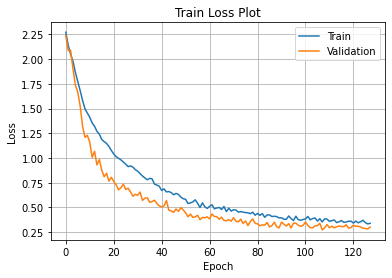

In [65]:
# Plot the the training loss
plt.plot(results.history["loss"],label="Train")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="Validation")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.title("Train Loss Plot")

plt.grid()

# Put legend table
plt.legend()

# Show the plot
plt.show()

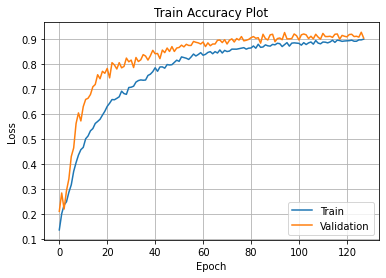

In [66]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"],label="Train")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="Validation")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.title("Train Accuracy Plot")
plt.grid()
# Put legend table
plt.legend()

# Show the plot
plt.show()

In [67]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, Y_test)

# Print the result
print(f"Loss: {score[0]} Acc: %{score[1]*100}")

28/28 [==============================] - 0s 10ms/step - loss: 0.3977 - accuracy: 0.8993
Loss: 0.3976658880710602 Acc: %89.93135094642639
